# Statistik Labor Aufgabe 1

### Importieren von Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Funktionen

#### Einlesen der Daten

In [2]:
def readData(filename)->pd.DataFrame:
    # Daten einlesen
    df = pd.read_csv(filename,
                           sep=';',
                           header=None,
                           names=['Personalnummer', 
                                    'Anrede', 
                                    'Vorname', 
                                    'Nachname',
                                    'Geburtsdatum'],
                            encoding='latin-1') # encoding auf latin-1 da sonst probleme mit Umlauten
    pd.set_option('display.max_columns', None)
    return df

#### Daten bereinigen

In [3]:
def clean(data)->pd.DataFrame:
    cleandata = data.copy()
    errorframe = cleandata.loc[pd.to_datetime(data['Geburtsdatum'], format='%d.%m.%Y',errors='coerce').isna(), ['Personalnummer', 
                                    'Anrede', 
                                    'Vorname', 
                                    'Nachname',
                                    'Geburtsdatum']]
    indizes = [23, 39, 41, 54, 64, 65, 73, 81, 100]
    cleandata = cleandata.drop(indizes)
    for i in indizes:
        errorframe.loc[i,'Datensatz?'] = 'Löschen'
        errorframe.loc[i, 'Typ'] = 'Kein Datum'
    cleandata.at[7, 'Geburtsdatum'] = '16.02.1963'
    errorframe.loc[7, 'Datensatz?'] = 'Korrektur'
    errorframe.loc[7, 'Typ'] = 'Falsche Spalte'
    cleandata.at[21, 'Geburtsdatum'] = '01.02.1965'
    errorframe.loc[21, 'Datensatz?'] = 'Korrektur'
    errorframe.loc[21, 'Typ'] = 'Monat reicht für Alter'
    return cleandata, errorframe

#### Geburtsdatum zu Alter konvertieren

In [4]:
def from_dob_to_age(dob)->int:
    st = datetime(2005,12,31)
    a = st.year - dob.year - ((st.month, st.day) < (dob.month, dob.day))
    return a

#### Alter aller Personen eines Geschlechts

In [5]:
def get_gender_based_birthdays(data, gender=None)->pd.DataFrame:
    # Alle Alterszahlen des angegebenen Geschlechts
    # Wenn kein Geschlecht angegeben ist gibt diese Funktion alle Alterszahlen zurück
    if gender is not None:
        data = data[data['Anrede'] == gender]
    
    # Alter ausrechnen
    
    age = pd.DataFrame(columns=['age'])

    age['age'] = pd.to_datetime(data['Geburtsdatum'], format="%d.%m.%Y").apply(lambda x: from_dob_to_age(x) if from_dob_to_age(x) < 100 else np.nan)
    age = age.dropna()

    
    return age

#### Werte berrechnen (Mittelwert, Varianz, Std.-Abw, Median, Spannweite)

In [6]:
def age_average(data)->float:
    # Berechne durchschnittliches Alter
    return data['age'].mean()

def age_variance(data)->float:
    # Berechne Altersvarianz
    variance = data['age'].var()
    return variance
    
def age_standard_deviation(data)->float:
    # Berechne Standardabweichung
    return data['age'].std()

def get_median(data)->float:
    # Berechne Median
    return data['age'].median()

def get_range(data)->float:
    # Berechne Range
    return data['age'].max() - data['age'].min()

### Code

In [7]:
dt = readData('sr_aufg_1_35.txt')

In [8]:
dt_clean, err = clean(dt)

> Korrektur
>
> Zu vor waren die Intervalle der Altersgruppen 
> $$[0,20), [20,30), [30,40), [40,50), [50,\infty)$$
> Oder auch
> $$\{y|0<=y<20\}, \{y|20<=y<30\}, usw.$$
> Aufgabenstellung: "Es sollen die Altersklassen bis (einschließlich) 20 Jahre [...] gewählt werden." </br>
> Aus diesem Grund lauten die neuen Intervalle </br>
> $$[0,20], (20,30], (30,40], (40,50], (50,\infty)$$
> Oder auch
> $$\{y|0<=y<=20\}, \{y|20<y<=30\}, usw.$$

In [9]:
gbb = get_gender_based_birthdays(dt_clean,'Herr')
male_average = age_average(gbb)
male_variance = age_variance(gbb)
male_standard_deviation = age_standard_deviation(gbb)
male_median = get_median(gbb)
male_range = get_range(gbb)
male_a020 = gbb[gbb['age'].apply(lambda y: y >= 0 and y <= 20)]
male_a2030 = gbb[gbb['age'].apply(lambda y: y > 20 and y <= 30)]
male_a3040 = gbb[gbb['age'].apply(lambda y: y > 30 and y <= 40)]
male_a4050 = gbb[gbb['age'].apply(lambda y: y > 40 and y <= 50)]
male_a50 = gbb[gbb['age'].apply(lambda y: y > 50)]
male_all = gbb['age']

gbb = get_gender_based_birthdays(dt_clean, 'Frau')
female_average = age_average(gbb)
female_variance = age_variance(gbb)
female_standard_deviation = age_standard_deviation(gbb)
female_median = get_median(gbb)
female_range = get_range(gbb)
female_a020 = gbb[gbb['age'].apply(lambda y: y >= 0 and y <= 20)]
female_a2030 = gbb[gbb['age'].apply(lambda y: y > 20 and y <= 30)]
female_a3040 = gbb[gbb['age'].apply(lambda y: y > 30 and y <= 40)]
female_a4050 = gbb[gbb['age'].apply(lambda y: y > 40 and y <= 50)]
female_a50 = gbb[gbb['age'].apply(lambda y: y > 50)]
female_all = gbb['age']

gbb = get_gender_based_birthdays(dt_clean)
average = age_average(gbb)
variance = age_variance(gbb)
standard_deviation = age_standard_deviation(gbb)
median = get_median(gbb)
rng = get_range(gbb)



In [10]:
averages = {
    0 : average,
    1 : female_average,
    2 : male_average
    }
variances = {
    0 : variance,
    1 : female_variance,
    2 : male_variance
    }
deviations = {
    0 : standard_deviation,
    1 : female_standard_deviation,
    2 : male_standard_deviation
    }
medians = {
    0 : median,
    1 : female_median,
    2 : male_median
    }
ranges = {
    0 : rng,
    1 : female_range,
    2 : male_range
    }
dat = [ 
    averages.values(),
    variances.values(),
    deviations.values(),
    medians.values(),
    ranges.values()
    ]

In [11]:
dataf = pd.DataFrame(dat, columns=['gesamt', 'Frauen', 'Männer'], 
        index=['Mittelwert', 'Varianz', 'Std.-Abw', 'Median', 'Spannweite'])

### Ausgabe

#### Mittelwerte, Varianzen und Std.-Abw

In [12]:
dataf = dataf.round(4)
print(dataf.to_string())

              gesamt   Frauen    Männer
Mittelwert   39.9412  36.0196   43.8627
Varianz     153.7589  98.9796  180.2408
Std.-Abw     12.4000   9.9488   13.4254
Median       39.0000  35.0000   47.0000
Spannweite   46.0000  45.0000   46.0000


#### Korrekturen und Bereinigungen

In [13]:
print(err[['Nachname', 'Geburtsdatum', 'Datensatz?', 'Typ']].to_string())
# Nur einzele Spalten ausgeben
# Bessere Lesbarkeit

       Nachname      Geburtsdatum Datensatz?                     Typ
7    16.02.1963               NaN  Korrektur          Falsche Spalte
21          Rau   im Februar 1965  Korrektur  Monat reicht für Alter
23       Wagner        VHVeHvZZXM    Löschen              Kein Datum
39      Hartung         27.09.814    Löschen              Kein Datum
41         Weiß                      Löschen              Kein Datum
54    Schneider         unbekannt    Löschen              Kein Datum
64       Berger              xxxx    Löschen              Kein Datum
65          Alt            20.11.    Löschen              Kein Datum
73       Walter        24.10.2824    Löschen              Kein Datum
81       Seidel              xxxx    Löschen              Kein Datum
100      Kaiser        12.12.2540    Löschen              Kein Datum


#### Balkendiagramm

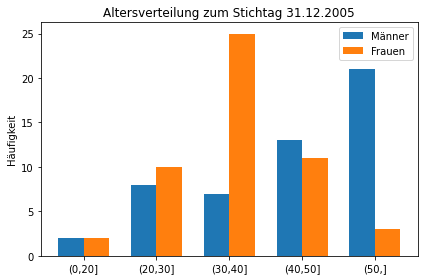

In [14]:
labels = np.array(['(0,20]','(20,30]','(30,40]','(40,50]','(50,]'])
male = np.array([
    len(male_a020.index),
    len(male_a2030.index),
    len(male_a3040.index),
    len(male_a4050.index),
    len(male_a50.index)
])
female = np.array([
    len(female_a020.index),
    len(female_a2030.index),
    len(female_a3040.index),
    len(female_a4050.index),
    len(female_a50.index)
])
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rect1 = ax.bar(x-width/2,male,width,label="Männer")
rect2 = ax.bar(x+width/2,female,width,label="Frauen")

ax.set_ylabel("Häufigkeit")
ax.set_title("Altersverteilung zum Stichtag 31.12.2005")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

#### Tortendiagramme 

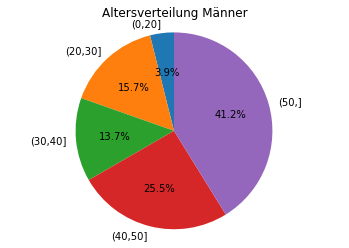

In [15]:
male_all_count = len(male_all)
labels = ['(0,20]','(20,30]','(30,40]','(40,50]','(50,]']
sizes = [
        len(male_a020)/male_all_count*100,
        len(male_a2030)/male_all_count*100,
        len(male_a3040)/male_all_count*100,
        len(male_a4050)/male_all_count*100,
        len(male_a50)/male_all_count*100
        ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')
plt.title("Altersverteilung Männer")
plt.show()

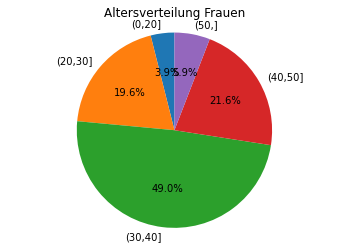

In [16]:
female_all_count = len(female_all)
sizes = [
        len(female_a020)/female_all_count*100,
        len(female_a2030)/female_all_count*100,
        len(female_a3040)/female_all_count*100,
        len(female_a4050)/female_all_count*100,
        len(female_a50)/female_all_count*100
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')
plt.title("Altersverteilung Frauen")
plt.show()